In [7]:
import numpy as np
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics import ert

(<Axes: >, None)

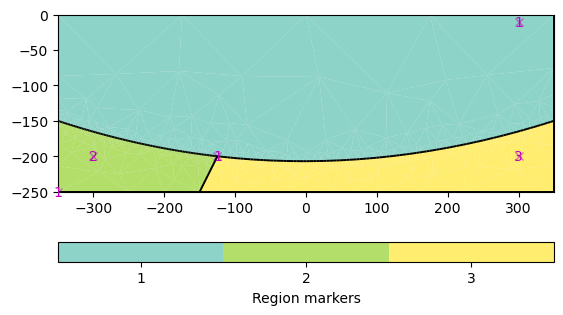

In [8]:
world = mt.createWorld(start=(-350, -250), end=(350, 0))

iPos = (-125, -200) #Inyection Point
iPos2 = (125, -200) #Inyection Point 2
fault = mt.createPolygon([iPos, (-150, -250)], isClosed= True)
layer = mt.createPolygon([(-350, -150), iPos, (350, -150)], 
                         addNodes=100, interpolate='spline', isClosed=False)

world += layer
world += fault

world.addRegionMarker((300, -10), marker=1)
world.addRegionMarker((-300, -200), marker=2)
world.addRegionMarker((300, -200), marker=3)

pg.show(world)

relativeError set to a value > 0.5 .. assuming this is a percentage Error level dividing them by 100
Data error estimate (min:max)  0.030000436471396982 : 0.03044701914958582


(<Axes: >, <matplotlib.colorbar.Colorbar at 0x1a7be12dfa0>)

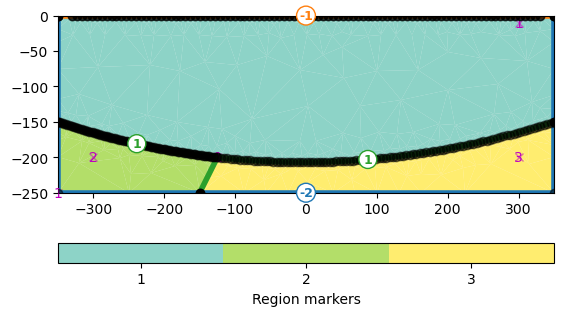

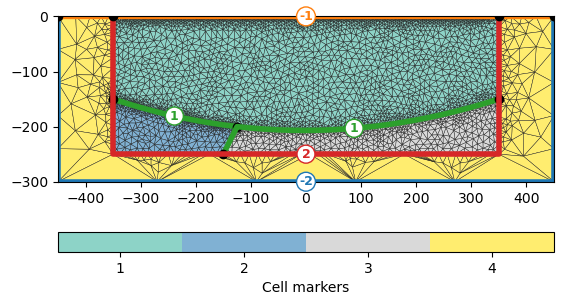

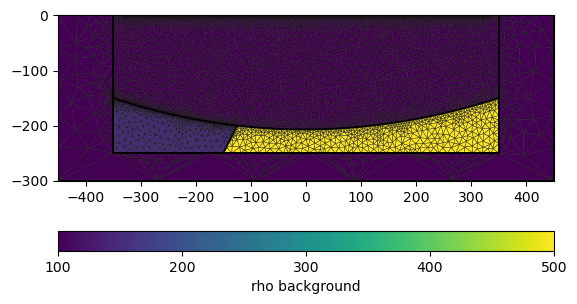

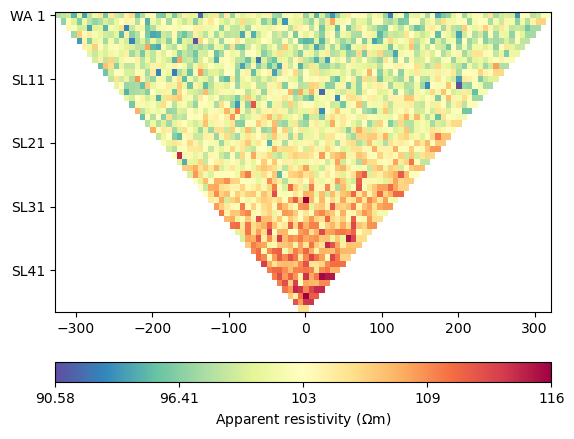

In [9]:
# Sensors should no be on the corner so we put them a little inside
scheme = ert.createData(elecs=np.linspace(start=-330, stop=330, num=96),
                           schemeName='slm')

# we need local refinement at the electrodes to achieve sufficient accuracy
for p in scheme.sensors():
    world.createNode(p)
    world.createNode(p - [0, 0.1])

pg.show(world, markers=True, showNodes=True)

mesh = mt.createMesh(world, quality=33, area=100)

mesh = mt.appendTriangleBoundary(mesh, xbound=100, ybound=50, marker=4)

pg.show(mesh, markers=True, showMesh=True)

rhoMin = 1
rhoMax = 100
rho0 = pg.solver.cellValues(mesh, {1: 100,
                                   2: 150,
                                   3: 500,
                                   4: 100,}
                                   )

pg.show(mesh, rho0, label='rho background', showMesh=True)

data = ert.simulate(mesh, scheme=scheme, res=rho0, 
                    noiseLevel=3, noiseAbs=1e-6, seed=1337)

pg.show(data)